<a href="https://colab.research.google.com/github/NazhlyFlorez/Estadistica1_parte3/blob/main/Estadistica_practica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files # Se usa para cargar archivos en google colab
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math

#Estadistica descriptiva para variables cualitativas

En este proyecto se analizará el comportamiento estadístico de variables aleatorias asociadas a un conjunto de datos, estos serán datos univariados, el comportamiento se analizará mediante:

*   Graficos para datos univariados cualitativos
*   Proporciones asociadas a los valores de una variable cualitativa

In [ ]:
# Usamos la función files.upload función (de google.Colab) se usa Para cargar la base de datos con la que se va a realizar el estudio.
uploaded = files.upload()

Saving BD-EEVV-Nacimientos-2023.csv to BD-EEVV-Nacimientos-2023.csv


In [ ]:
# añadimos un nuevo elemento llamado "io_csv" la cual tendrá la base de datos que subimos anteiormente, usamos la función Bytes.io (de io) para cargar la
#base de datos a la consola de python
io_csv = io.BytesIO(uploaded['BD-EEVV-Nacimientos-2023.csv'])

#Añadimos otro elemento llamado "tablas" que almcenará la base de datos en una estructura de tipo DataFrame, esta es una estructura de datos bidimensional, similar a una tabla, donde las filas representan registros y las columnas representan características o variables
#Para esto se usa la función read_cvs (de pandas) la cual necesita el archivo de la base de datos que es io_csv, la separación de los datos del archivo csv (que en este caso es por comas),
#además de que la primera columna del archivo se tome como un índice (es decir, se usa el argumento index_col=0) y su codificación será 'latin-1' ya que el archivo posee
#letras en latín.
tabla = pd.read_csv(io_csv, sep = ",",index_col=0, encoding='latin-1')

#Si deseamos ver el contenido de la tabla (en este caso queremos ver las 3 primeras filas, entonces ejecutamos el codigo tabla.head(3)), esto sirve para verificar
#que el archivo se subió correctamente.
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
23,417,1,1,NaN,1,8,5,2023,1,1,...,2,25/09/2015,2,2,2.0,44,99,99,1.0,1
11,1,1,1,NaN,2,6,4,2023,2,1,...,1,NaN,1,1,1.0,35,11,3,1.0,1
11,1,1,1,NaN,1,6,4,2023,7,1,...,1,NaN,1,1,1.0,32,9,6,1.0,1


In [ ]:
#Se crea un nuevo elemento llamado "tabla1" (que es un dataframe) el cual almacenará una parte de la tabla que hicimos anteriormente, es decir, crearemos una subtabla
#en base a la tabla anterior, para esto se usará la variable tabla1 y de ahí se selccionarán y escribirán las filas con las cuales haremos la subtabla separadas por comas,
#en este caso se selecionarán las variables "T_GES": Tiempo de gestación de un nacido vivo y "TALLA_NAC": Talla de un nacido vivo, al nacer.
tabla1 = tabla[['T_GES', 'TALLA_NAC']]

#Aplicando lo mismo que se le aplicó a la tabla verificamos que estuvieron bien seleccionadas las columnas y que la subtabla se creó de la manera esperada.
tabla1.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
23,4,5
11,4,4
11,4,4
11,4,5


In [ ]:
#Según la documentación y la forma en que se realizó la toma de la base de datos, estos mismos son cualitativos ya que están separados por categorías, por ende al definir
#las variables "T_GES: Tiempo de gestación de un nacido vivo y "TALLA_NAC": Talla de un nacido vivo, al nacer, serán variables cualitativas, según la documentación de la base de datos
#hay valores en los cuales no hay información, por ende debemos eliminarlos ya que son considerados valores faltantes, para esto crearemos un nuevo elemento llamado "df2", el cuál será una subtabla que sería la misma que la anterior pero sin esos valores
# por ende decimos que cada variable sea menor o diferente de un valor específico separado por un &, en este caso el tiempo de gestación de un nacido vivo debe ser diferente de 6 diferente de 9
#ya que en 6 nos dicen que el valor es ignorado, es decir, que el dato debió haberse resgistrado pero no fue proporcionado o no se registró o fue omitido y en 9 este valor no posee información al respecto (tabla1['T_GES'] != 9) & (tabla1['T_GES'] != 6)
#para cuando estemos tratando con la talla de un nacido viv, este debe ser diferente de 9 ya que este valor no posee información al respecto (tabla1.TALLA_NAC !=9).
df2 = tabla1[(tabla1['T_GES'] != 9) & (tabla1['T_GES'] != 6) & (tabla1.TALLA_NAC !=9)]

#Aplicando lo mismo que se le aplicó a la subtabla anterior verificamos que los valores faltantes se eliminaron y que la subtabla modificada se crearon de la manera esperada.
df2.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
23,4,5
11,4,4
11,4,4
11,4,5


In [ ]:
#Como necesitamos hacer el diagrama de barras de la variable cualitativas ("T_GES": Tiempo de gestación de un nacido vivo)
#entonces vamos a convertir los elementos de la columnas "T_GES" a tipo texto, caracter o "string" como suele ser llamado ya que si no lo hacemos entonces tomaría
#las variables como variables cuantitativas en vez de cualitativas ya que los datos de las columnas se tomarían como enteros, para esto usamos la función astype (de pandas) con argumento str
#que es como se denota un string.
df2.T_GES = df2.T_GES.astype(str)

#Se imprimen las dos primeras columnas para verificar que si se convirtieron en strings.
df2.T_GES.head(2)

<ipython-input-7-cbaf40069e36>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES = df2.T_GES.astype(str)


,T_GES
COD_DPTO,
23,4
11,4


In [ ]:
#Como necesitamos hacer el diagrama de barras de la variable cualitativas ("TALLA_NAC": Talla de un nacido vivo, al nacer.)
#entonces vamos a convertir los elementos de la columnas "TALLA_NAC" a tipo texto, caracter o "string" como suele ser llamado ya que si no lo hacemos entonces tomaría
#las variables como variables cuantitativas en vez de cualitativas ya que los datos de las columnas se tomarían como enteros, para esto usamos la función astype (de pandas) con argumento str
#que es como se denota un string.
df2.TALLA_NAC = df2.TALLA_NAC.astype(str)

#Se imprimen las dos primeras columnas para verificar que si se convirtieron en strings.
df2.TALLA_NAC.head(2)

<ipython-input-8-4900d81a974b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str)


,TALLA_NAC
COD_DPTO,
23,5
11,4


In [ ]:
#Mediante la función df2.loc (de pandas) localizaremos la filas de la columna asociada la variable T_GES donde la variable es igual a un valor específico de todos los posibles valores
#que puede tomar, los valores se dejan "entre comillas" ya que anteiormente los habíamos cambiado a tipo string, por ende si no se pusieran entre comillas serían tomados como enteros, lo cuál
#ocasionaría errores, luego seleccionamos la columna de donde localizamos esas filas (en este caso es la columna T_GES) y todos los elementos que se encuentran en esa columna y que toman ese valor
#específico se renombrarán de una manera distinta dependiendo del valor y una característica distintiva que posean, cada renombramiento y cada localización están separados por orden en comas (en este caso los renombraremos dependiendo de como se interpreten en la documentación de la base de datos).
df2.loc[(df2.T_GES == "1"), "T_GES"], df2.loc[(df2.T_GES == "2"), "T_GES"], df2.loc[(df2.T_GES == "3"), "T_GES"] = "MENOS DE 22", "22-27", "28-37"
df2.loc[(df2.T_GES == "4"), "T_GES"], df2.loc[(df2.T_GES == "5"), "T_GES"], df2.loc[(df2.T_GES == "6"), "T_GES"] = "38-41", "42 O MÁS", "IGNORADO"
df2.loc[(df2.T_GES == "9"), "T_GES"] = "NA"

#Se imprimen las cuatro primeras columnas para determinar si el renombre de cada valor fue realizado con éxito.
df2.head(4)

#En este caso no aparecen valores de "IGNORADO" ni "NA" ya que por se valores faltantes anteriormente fueron eliminados de df2

,T_GES,TALLA_NAC
COD_DPTO,,
23,38-41,5
11,38-41,4
11,38-41,4
11,38-41,5


In [ ]:
##Mediante la función df2.loc (de pandas) localizaremos la filas de la columna asociada la variable TALLA_NAC donde la variable es igual a un valor específico de todos los posibles valores
#que puede tomar, los valores se dejan "entre comillas" ya que anteiormente los habíamos cambiado a tipo string, por ende si no se pusieran entre comillas serían tomados como enteros, lo cuál
#ocasionaría errores, luego seleccionamos la columna de donde localizamos esas filas (en este caso es la columna TALLA_NAC) y todos los elementos que se encuentran en esa columna y que toman ese valor
#específico se renombrarán de una manera distinta dependiendo del valor y una característica distintiva que posean, cada renombramiento y cada localización están separados por orden en comas (en este caso los renombraremos dependiendo de como se interpreten en la documentación de la base de datos).
df2.loc[(df2.TALLA_NAC == "1"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "2"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "3"), "TALLA_NAC"] = "MENOS DE 20", "20-29", "30-39"
df2.loc[(df2.TALLA_NAC == "4"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "5"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "6"), "TALLA_NAC"] = "40-49", "50-59", "60 O MÁS"
df2.loc[(df2.TALLA_NAC == "9"), "TALLA_NAC"] = "NA"

#Se imprimen las cuatro primeras columnas para determinar si el renombre de cada valor fue realizado con éxito.
df2.head(4)

#En este caso no aparecen valores de "NA" ya que por se valores faltantes anteriormente fueron eliminados de df2

,T_GES,TALLA_NAC
COD_DPTO,,
23,38-41,50-59
11,38-41,40-49
11,38-41,40-49
11,38-41,50-59


# Análisis de gráficas y de resultados de la variable "T_GES": Tiempo de gestación de un nacido vivo

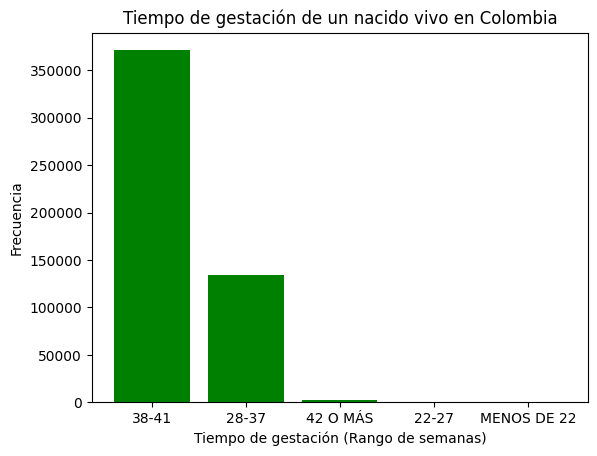

In [ ]:
#Graficando el diagrama de barras

#Se crea un elemento llamado "x_values" el cual será el eje x del diagrama de barras que será una estructura tipo array la cual almacenará los posibles valores que pueden tomar la variable del tiempo de gestación de un nacido vivo o T_GES, para esto se usa la función unique (de pandas) que encuentra todos
#los posibles valores distintos que pueden haber en la columna T_GES que en este caso serían las categrorías en las cuales se agrupan los datos.
x_values = df2.T_GES.unique()

#Se crea un elemento llamado "y_values" el cual será el eje y del diagrama de barras que será una estructura de tipo array la cual almacenará los conteos de cada valor distinto que se tomó
#en x_values, es decir va a almacenar en y_values el número de veces que aparece cada valor en la columna T_GES, esto se hace mediante la función value_counts() y para convertir el conjunto de valores
#en un array se añade .tolist() a value_counts() (.value_counts().tolist()).
y_values = df2.T_GES.value_counts().tolist()

#Se crea el gráfico del diagrama de barras usando la función plt.bar (de matplotlib) la cual recibe como argumentos (eje x, eje y, color), de donde eje x = x_values, eje y = y_values y verde (green)
#que será el respectivo color del gráfico
plt.bar(x_values, y_values, color = 'green')

#Mediante la función plt.tittle (de matplotlib) le agregamos un título al diagrama de barras
plt.title('Tiempo de gestación de un nacido vivo en Colombia')

#Con plt.subplot() (de matplotlib) nos divide el área del gráfico de modo que el diagrama de barras no ocupe toda el área ya que debe haber espacion para los respectivos ejes
#y demás cosas que se deban añadir al gráfico
ax = plt.subplot() #Axis

#Mediante la función ax.set_xlabel (de matplotlib) le establecemos un título al eje x
ax.set_xlabel('Tiempo de gestación (Rango de semanas)')

#Mediante la función ax.set_ylabel (de matplotlib) le establecemos un título al eje y
ax.set_ylabel('Frecuencia')

#Con plt.show() (de matplotlib) nos muestra  el diagrama de barras junto con todos los títulos que se añadieron respectivamente
plt.show()

El valor de 38 a 41 semanas de gestación es el rango de semanas de gestación donde se tiene alrededor de 370000 nacidos vivos en Colombia, y es donde se tienen más nacidos vivos en Colombia. En el rango de 28 a 37 semanas de gestación se tienen aproximadamente 140000 nacidos vivos en Colombia. Los rangos de semanas de gestación de 42 o más, de 22 a 27 y de menos de 22 tienen menos de 50000 nacidos vivos en Colombia.

In [ ]:
#Como ya conocemos y_values (lo definimos anteriormente en el diagrama de barras y sabemos que es un array), y_values sería un array que contiene las frecuencias de cada valor que tome la variable T_GES entonces definimos un nuevo elemento llamado "sizes" el cual almacenará a y_values
#pero en este caso y_values sería un arreglo tipo numpy, esto lo haremos con la función np.array (de numpy), este arreglo es el que se usa para realizar diagramas circulares.
sizes = np.array(y_values)

#Le decimos que nos muestre el contenido de sizes.
sizes

array([371090, 134513,   1950,    477,     19])

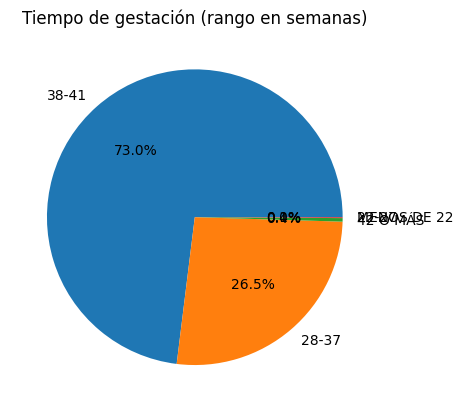

In [ ]:
#Grafica de diagrama circular

#Mediante la función plt.pie (de matplotlib) se crea el gráfico del diagrama circular, usando como argumentos (frecuencias, categorías o valores, se desea o no mostrar los porecentajes de cada categoría o rango en el gráfico)
#donde en este caso tenemos que frecuencias = sizes, las categorías o valores que puede tomar la variable son x_values y autopct='%1.1f%%' es la opción para mostrar los porcentajes de cada categoría en el diagrama circular.
plt.pie(sizes, labels = x_values, autopct='%1.1f%%')

#Mediante la función plt.tittle (de matplotlib) le agregamos un título al diagrama circular
plt.title('Tiempo de gestación (rango en semanas)')

#la función show (de matplotlib.pyplot) muestra el gráfico del diagrama circular
plt.show()

In [ ]:
#Calculando los porcentajes de cada categoría

#Se crea un nuevo elemento llamado "porcentaje" el cual almacenará una lista de python que contiene el porcentaje que tiene cada categoría o valor o grupo de datos en la variable "T_GES"
#lo que se hace es que se crea un bucle for en el array y_values que es el que contiene las frecuencias de cada valor que puede tomar "T_GES" y lo divide entre el total de datos que posee "T_GES"
porcentaje = [(x/len(df2.T_GES)*100)for x in y_values]

#Imprime x_values que son los valores que puede tomar T_GES
print(x_values)

#Se imprimen los porcentajes
print(porcentaje)

['38-41' '28-37' '42 O MÁS' '22-27' 'MENOS DE 22']
[73.04216719253458, 26.476383183511825, 0.38382124558851605, 0.09388858161319086, 0.0037397967518881053]


De acuerdo con los porcentajes anteiormente calculados y el diagrama circular aproximadamente el 73.04% de las nacidos vivos en Colombia tienen entre 38 y 41 semanas de gestación, el 26.47% entre 28 y 37 semanas de gestación, el 0.38% entre 42 o más semanas de gestación, el 0.093% entre 22 y 27 semanas de gestación y el 0.0037% de los nacidos vivos en Colombia tiene menos de 22 semanas de gestación.

# Gráficas y Análisis de resultados de la variable "TALLA_NAC": Talla de un nacido vivo, al nacer.

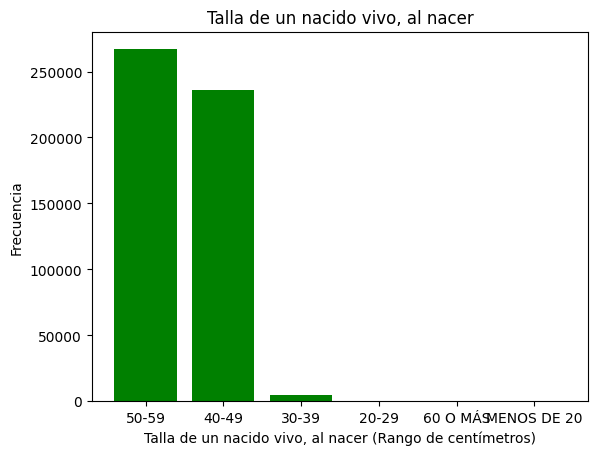

In [ ]:
#Graficando el diagrama de barras

#Se crea un elemento llamado "x_values" el cual será el eje x del diagrama de barras que será una estructura tipo array la cual almacenará los posibles valores que pueden tomar la variable de la talla de un nacido vivo, al nacer o TALLA_NAC, para esto se usa la función unique (de pandas) que encuentra todos
#los posibles valores distintos que pueden haber en la columna TALLA_NAC que en este caso serían las categrorías en las cuales se agrupan los datos.
x_values1 = df2.TALLA_NAC.unique()

#Se crea un elemento llamado "y_values" el cual será el eje y del diagrama de barras que será una estructura de tipo array la cual almacenará los conteos de cada valor distinto que se tomó
#en x_values, es decir va a almacenar en y_values el número de veces que aparece cada valor en la columna TALLA_NAC, esto se hace mediante la función value_counts() y para convertir el conjunto de valores
#en un array se añade .tolist() a value_counts() (.value_counts().tolist()).
y_values1 = df2.TALLA_NAC.value_counts().tolist()

#Se crea el gráfico del diagrama de barras usando la función plt.bar (de matplotlib) la cual recibe como argumentos (eje x, eje y, color), de donde eje x = x_values, eje y = y_values y verde (green)
#que será el respectivo color del gráfico
plt.bar(x_values1, y_values1, color = 'green')

#Mediante la función plt.tittle (de matplotlib) le agregamos un título al diagrama de barras
plt.title('Talla de un nacido vivo, al nacer')

#Con plt.subplot() (de matplotlib) nos divide el área del gráfico de modo que el diagrama de barras no ocupe toda el área ya que debe haber espacion para los respectivos ejes
#y demás cosas que se deban añadir al gráfico
ax = plt.subplot() #Axis

#Mediante la función ax.set_xlabel (de matplotlib) le establecemos un título al eje x
ax.set_xlabel('Talla de un nacido vivo, al nacer (Rango de centímetros)')

#Mediante la función ax.set_ylabel (de matplotlib) le establecemos un título al eje y
ax.set_ylabel('Frecuencia')

#Con plt.show() (de matplotlib) nos muestra  el diagrama de barras junto con todos los títulos que se añadieron respectivamente
plt.show()

El valor de 50 a 59 centímetros es el rango de la talla, al nacer donde se tienen alrededor de 270000 nacidos vivos en Colombia, y es donde se tienen más nacidos vivos en Colombia. En el rango de 40 a 49 centímetros se tienen aproximadamente 240000 nacidos vivos en Colombia. Los rangos de la talla,al nacer en centímetros de 30 a 39, de 20 a 29, 60 o más y de menos de 20 tienen menos de 50000 nacidos vivos en Colombia.

In [ ]:
#Como ya conocemos y_values1 (lo definimos anteriormente en el diagrama de barras y sabemos que es un array), y_values1 sería un array que contiene las frecuencias de cada valor que tome la variable TALLA_NAC entonces definimos un nuevo elemento llamado "sizes" el cual almacenará a y_values1
#pero en este caso y_values1 sería un arreglo tipo numpy, esto lo haremos con la función np.array (de numpy), este arreglo es el que se usa para realizar diagramas circulares.
sizes1 = np.array(y_values1)

#Le decimos que nos muestre el contenido de sizes.
sizes1

array([266938, 235727,   5054,    306,     20,      4])

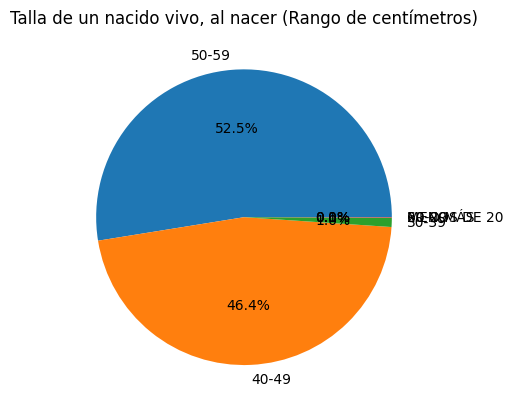

In [ ]:
#Grafica de diagrama circular

#Mediante la función plt.pie (de matplotlib) se crea el gráfico del diagrama circular, usando como argumentos (frecuencias, categorías o valores, se desea o no mostrar los porecentajes de cada categoría o rango en el gráfico)
#donde en este caso tenemos que frecuencias = sizes, las categorías o valores que puede tomar la variable son x_values1 y autopct='%1.1f%%' es la opción para mostrar los porcentajes de cada categoría en el diagrama circular.
plt.pie(sizes1, labels = x_values1, autopct='%1.1f%%')

#Mediante la función plt.tittle (de matplotlib) le agregamos un título al diagrama circular
plt.title('Talla de un nacido vivo, al nacer (Rango de centímetros)')

#la función show (de matplotlib.pyplot) muestra el gráfico del diagrama circular
plt.show()

In [ ]:
#Calculando los porcentajes de cada categoría

#Se crea un nuevo elemento llamado "porcentaje1" el cual almacenará una lista de python que contiene el porcentaje que tiene cada categoría o valor o grupo de datos en la variable "TALLA_NAC"
#lo que se hace es que se crea un bucle for en el array y_values1 que es el que contiene las frecuencias de cada valor que puede tomar "TALLA_NAC" y lo divide entre el total de datos que posee "TALLA_NAC"
porcentaje1 = [(x/len(df2.TALLA_NAC)*100)for x in y_values1]

#Imprime x_values que son los valores que puede tomar T_GES
print(x_values1)

#Se imprimen los porcentajes
print(porcentaje1)

['50-59' '40-49' '30-39' '20-29' '60 O MÁS' 'MENOS DE 20']
[52.54178238713195, 46.39847731222776, 0.9947859360022361, 0.06023041084619791, 0.003936628159882216, 0.0007873256319764433]


De acuerdo con los porcentajes anteiormente calculados y el diagrama circular aproximadamente el 52.54% de las nacidos vivos en Colombia su talla al nacer está entre 50 y 59 centímetros, el 46.39% entre 40 y 49 centímetros, el 0.99% entre 30 y 39 centímetros, el 0.060% entre 20 y 29 centímetros, el 0.003% entre 60 o más centímetros y el 0.0007% de los nacidos vivos en Colombia, su talla al nacer es de menos de 20 centímetros.

# Tablas de contingencia


*   Representación gráfica de una tabla de contingencia
*   Proporciones asociadas a una tabla de contingencia



Crearemos una tabla de contingencia que es un arreglo matricial donde se cuentan los elementos de dos variables, su objetivo es resumir la relación entre dos variables categóricas, en este caso sería número de nacidos vivos según sus semanas de gestación y su talla al nacer, como anteriormente ya habíamos cambiado los valores según la docuentación de la base de datos de las variables "T_GES": Tiempo de gestación de un nacido vivo y "TALLA_NAC": Talla de un nacido vivo, al nacer, entonces procederemos a calcular la respectiva tabla de contingencia:

In [ ]:
tabla_cont = pd.crosstab(df2.T_GES, df2['TALLA_NAC'])
#La función pd.crosstab se usa con el fin de realizar una tabla de contingencia
tabla_cont
#La tabla muestra el tiempo de gestación de un nacido vivo (T_GES) y la talla de un nacido vivo(TALL_NAC)

TALLA_NAC,20-29,30-39,40-49,50-59,60 O MÁS,MENOS DE 20
T_GES,,,,,,
22-27,251,1646,50,1,0,2
28-37,44,3357,95455,35657,0,0
38-41,0,46,140106,230919,19,0
42 O MÁS,0,0,116,360,1,0
MENOS DE 22,11,5,0,1,0,2


<function matplotlib.pyplot.show(close=None, block=None)>

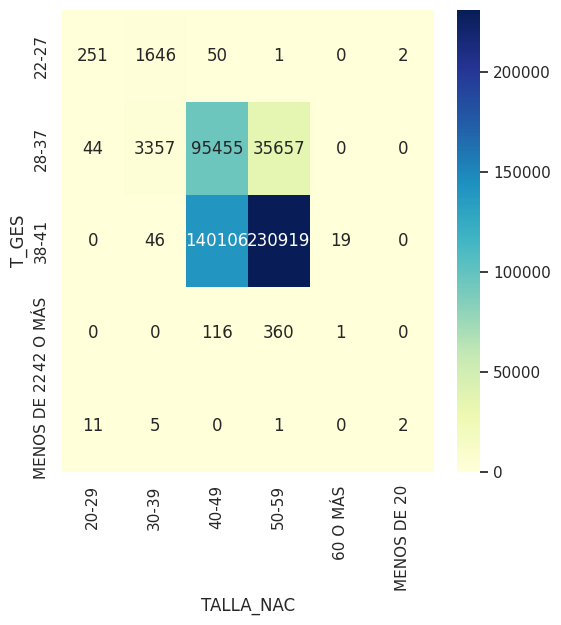

In [ ]:

sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
heatmap = sns.heatmap(tabla_cont, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
# Por medio de la función sns.heatmap la cual muestra la grafica del con el numero de individuos que cumplen los argumentos.
plt.show
#codigo grafica

In [ ]:
#para visualirar el numero de individuos totales se puede visualizar con el comando
len(df2.TALLA_NAC)

508049

Es importante resaltar lo siguiente: \\
La mayoría de los nacimientos ocurren entre 38 y 41 semanas de gestación, con tallas normales (40-59).

Los partos prematuros (28-37 semanas) también son comunes, pero están más asociados a tallas menores.

Las tallas extremas (MENOS DE 20 o MÁS DE 60) y semanas gestacionales extremas (MENOS DE 22 o MÁS DE 42) tienen muy pocos casos.

Por lo cual se puede calcular lo siguiente:

P(38-41 y 50-59)=
408049
230919
​
 ≈0.5660

 Es decir que la probabilidad de que un nacimiento esté entre las semanas 38-41 y tenga una talla de 50-59 es aproximadamente:

56.60
%

​

Se pueden plantear los siguientes casos donde se plantean probabilidades condicionales, tales como:

Dado que un recién nacido tuvo una talla al nacer de entre 50 y 59, la probabilidad de que haya nacido entre las semanas 28 y 37 es de aproximadamente

P(28-37∣50-59)=
266938
35657
​
 ≈0.1336

In [ ]:
res = stats.chi2_contingency(tabla_cont)

Se plantea la prueba de chi cuadrado, donde la hipotesis nulas corresponde a que las variables esten asociadas, independientes o homogeneas.
se puede presentar la hipotesis alternativa donde X y Y estén asociadas es decir que alguna varibale dependa de la otra o que no sean homogeneas.
En el caso a presentar no se puede decir que no es una prueba de homogeneidad "T_GES": Tiempo de gestación de un nacido vivo y "TALLA_NAC": Talla de un nacido vivo no son variables categóricas provenientes de distintas poblaciones, por lo tanto no es una prueba de homogeneidad.

Para plantear independencia puesto que es muy dificil aclarar cual variable depende de la otra por lo que no se pode trabjar independencia ni dependencia sobre estas variables.

Por medio de estas variables es una prueba de asociación tal que las variables "T_GES": Tiempo de gestación de un nacido vivo y "TALLA_NAC": Talla de un nacido vivo estan o no asociados.

In [ ]:
#Para realizar la prueba de hipotesis se define la función chi2_contingency

In [ ]:
res = stats.chi2_contingency(tabla_cont)
 #La función se aplica a la tabla de contingencia ya definida
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p  es d {valor_p}")
 # muestra el estadistico de prueba como el valor p (revisar si se rechaza la hip. nula)

El valor de la estadística Chi cuadrado es 283544.78878571023 y el valor p  es d 0.0


Como el valor es p<0.05 se rechaza la hipotesis nula.

Con una confianza del 95%  no se rechaza  que las variables  estan asociadas, es decir  "T_GES": Tiempo de gestación de un nacido vivo y "TALLA_NAC": Talla de un nacido vivo estan asociados.  

Es importante aclarar que:
*   Si el valor p < 0.05 se rrechaza la hipótesis nula
*   Si el valor p > 0.05 no se rechaza la hipotesis

In [ ]:
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.TALLA_NAC))) #Grados de asociación
coeficiente_phi = math.sqrt(chi/len(df2.TALLA_NAC))
coeficiente_v_creamer = math.sqrt(chi/(len(df2.TALLA_NAC)*min(4-1,2-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_creamer}") # el valor p revisar si se rechaza la hip. nula

#los coeficientes estan definidos entre cero y uno , si corresponde a 0 significa que no tiene asociacion y si corresponde a 1 quiere decir que hay una fuerte aso
# 0-0,2 insignificante, 0,2-0,4 discreto, 0,4 a 0,6 moderado, o,6-0,8 sustancial,0.8- 1 fuerte con estos valores se interpretan


Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.5984937865548654, 0.7470643881626543 y 0.7470643881626543


De acuerdo con el articulo Landis, J. R., & Koch, G. G. (1977). The Measurement of Observer Agreement for Categorical Data. Biometrics, 33(1), 159. https://doi.org/10.2307/2529310 se muestra que:
*   El coeficiente de contingencia es de 0.5984937865548654, esta vaariable tiene una asociación moderada
*   El coeficiente de Phi es de 0.7470643881626543, esta vaariable tiene una asociación sustancial
*   El coeficiente de  V de Cramer es de 0.7470643881626543,  esta vaariable tiene una asociación sustancial.
Por lo tanto las variables estan sustancialmente asociadas.





Donde ____  = nula ($Chi, \phi, v=0$),_____ = insignificantemente ($0 < Chi, \phi, v <0.4$),____ = discretamente ($0.2 < Chi, \phi, v <0.4$),_____ =moderadamente, ($0.4 < Chi, \phi, v <0.6$) ______ =sustancialmente ($0.6 < Chi, \phi, v <0.8$) y ______ = frecuentemente  ($0.8 < Chi, \phi, v <1$)

#Solución de las preguntas

1. ¿Cómo se comporta la variable tiempo de gestación de un nacido vivo en Colombia (T_GES)?


Las respectivas gráficas que presentan la distribución del tiempo de gestación (T_GES) de los nacidos vivos en Colombia durante 2023, se realiza de modo que los datos se encuentren agrupados en intervalos o categorías. El rango con mayor frecuencia es de 38 a 41 semanas, que corresponde aproximadamente a un 73.04% de los nacidos vivos en Colombia en 2023, y a su vez es aproximadamente a los 9 meses de gestación (con una variación de ±1.5 semanas). Este resultado es favorable, ya que un parto dentro de este periodo indica que el bebé ha completado su desarrollo y tiene menores riesgos al nacer, en el intervalo de 28 a 37 semanas, que corresponde a un 26.47% de los nacidos vivos en Colombia en 2023 (equivalente a 6.5 a 8.5 meses) es considerado como parto prematuro. En estos casos, mientras menor sea el tiempo de gestación, mayores son los riesgos para el recién nacido y la necesidad de atención médica especializada, además como se puede visualizar en el diagrama de barras y en el diagrama circular la variable aleatoria presenta una baja variabilidad, ya que estas dos categorías son las que acumulan la mayor cantidad de datos respecto al resto de categorías.

2. ¿Cómo se comporta la variable talla de nacimiento de un nacido vivo en Colombia
(TALLA_NAC)?

Las respectivas gráficas que presentan la distribución de la talla de un nacido vivo, al nacer (TALLA_NAC) de los nacidos vivos en Colombia durante 2023, se realiza de modo que los datos se encuentren agrupados en intervalos o categorías. El rango con mayor frecuencia es de 50 a 59 centímetros, que corresponde aproximadamente a un 52.54% de los nacidos vivos en Colombia en 2023) lo cual es un indicador positivo, ya que la talla considerada normal y saludable para un recién nacido ronda los 50 cm. Esto sugiere que la mayoría de los bebés en estos intervalos tienen condiciones de salud adecuadas al nacer, en el intervalo de 40 a 49 centímetros, que corresponde a un 46.39% de los nacidos vivos en Colombia en 2023 todavía puede ser considerado, además como se puede visualizar en el diagrama de barras y en el diagrama circular la variable aleatoria presenta una baja variabilidad, ya que estas dos categorías son las que acumulan la mayor cantidad de datos respecto al resto de categorías.

3. ¿Alguna variable depende de la otra, o, están asociadas? ¿Qué tan dependiente es una
variable de la otra o qué tan asociadas están ambas?

Se construyó una tabla de contingencia y se aplicó la prueba chi-cuadrado de independencia.
La hipótesis nula (H0H_0H0) establece que no hay relación entre el tiempo de gestación y la talla al nacer, mientras que la hipótesis alternativa (H1H_1H1) plantea que sí existe una relación.
Se obtuvo un valor de chi-cuadrado de χ2=5549.01\chi^2 = 5549.01χ2=5549.01 con un valor p menor que 0.05 (p<0.05p < 0.05p<0.05), lo que indica que se rechaza la hipótesis nula. Esto sugiere que existe una relación significativa entre el tiempo de gestación y la talla al nacer.
En particular, se observa que a mayor tiempo de gestación, mayor tiende a ser la talla al nacer, lo cual coincide con lo esperado desde el punto de vista biológico
